In [1]:
import random

Modèle classique

In [7]:
def portee_de_diffusion(abonnes, prop_min_init=0.2, seuil=0.1, taille_reseau=1e6, like_sub_gen=0.6, proba_exploration=0.01):


    population_touchee = abonnes

    t = 1 #une unité de temps apres la publication

    nombre_de_likes = random.randint(int(population_touchee * prop_min_init), population_touchee) #nombre de likes aléatoire
    total_like = nombre_de_likes
        
    #p:int
    proportion = nombre_de_likes / population_touchee #proportion de likes
    proportion_totale = proportion
    
    liste_pop_touchee= [population_touchee]
    liste_likes=[nombre_de_likes]

    while proportion > seuil: #tant que la proportion de likes est supérieure au seuil
        
        
        nouvelle_pop = int(proportion * proba_exploration * taille_reseau)
        population_touchee = population_touchee + nouvelle_pop
        t+=1
        
        
        nouvelle_pop_likes = random.randint(int(nouvelle_pop * proportion * like_sub_gen),
                                            int(nouvelle_pop * proportion))
 
        total_like += nouvelle_pop_likes
        propotion_totale = total_like / population_touchee
        proportion = nouvelle_pop_likes / nouvelle_pop  
        like_sub_gen = like_sub_gen * 0.9
        
        
        liste_pop_touchee.append(nouvelle_pop)
        liste_likes.append(nouvelle_pop_likes)
    
    
    return liste_pop_touchee, liste_likes #nombre total de personnes touchées par la publication

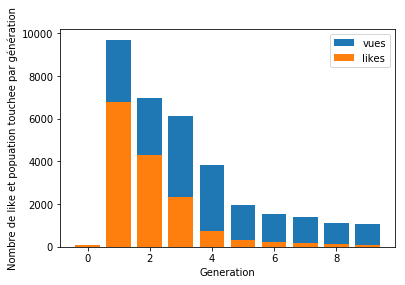

[100, 9700, 6982, 6131, 3824, 1976, 1553, 1403, 1104, 1059]
[97, 6773, 4281, 2345, 756, 307, 218, 155, 117, 65]


In [8]:
import matplotlib.pyplot as plt

vues,likes= portee_de_diffusion(100)

plt.bar(range(len(vues)), vues)
plt.bar(range(len(likes)), likes)
plt.xlabel("Generation")
plt.ylabel("Nombre de like et popuation touchee par génération")
plt.legend(["vues","likes"])
plt.show()

print(vues)
print(likes)




Nouvelle fonction, seul le return change



















In [9]:
def portee_de_diffusion2(abonnes, prop_min_init, seuil, taille_reseau, like_sub_gen, proba_exploration):


    population_touchee = abonnes

    t = 1 #une unité de temps apres la publication

    nombre_de_likes = random.randint(int(population_touchee * prop_min_init), population_touchee) #nombre de likes aléatoire
    total_like = nombre_de_likes
        
    #p:int
    proportion = nombre_de_likes / population_touchee #proportion de likes
    proportion_totale = proportion
    
    liste_pop_touchee= [population_touchee]
    liste_likes=[nombre_de_likes]

    nb_generations=0
    
    while proportion > seuil: #tant que la proportion de likes est supérieure au seuil
        
        
        nouvelle_pop = int(proportion * proba_exploration * taille_reseau)
        population_touchee = population_touchee + nouvelle_pop
        t+=1
        
        ### Comment modeliser en fonction du nombre de la proportion precedente
        
        nouvelle_pop_likes = random.randint(int(nouvelle_pop * proportion * like_sub_gen),
                                            int(nouvelle_pop * proportion))
 
        total_like += nouvelle_pop_likes
        propotion_totale = total_like / population_touchee
        proportion = nouvelle_pop_likes / nouvelle_pop  
        like_sub_gen = like_sub_gen * 0.9
        
        
        liste_pop_touchee.append(nouvelle_pop)
        liste_likes.append(nouvelle_pop_likes)
    
        nb_generations+=1
        
        
    return  (population_touchee, total_like, nb_generations)

On va faire varier les paramètres et voir  comment ça réagit au niveau des résultats.

In [10]:
def moyenne_3_resultats(abonnes, prop_min_init, seuil, taille_reseau, like_sub_gen, proba_exploration):
    
    x=0
    y=0
    z=0
    
    for i in range(10000):
        
        population_touchee, total_like, nb_generations = portee_de_diffusion2(abonnes, prop_min_init, seuil, taille_reseau, like_sub_gen, proba_exploration)
        
        x= x+ population_touchee
        y= y+ total_like
        z= z+ nb_generations
            
    return (x//10000, y//10000, z//10000)

On commence par faire varier le nombre d'abonnés (1er paramètre)

In [11]:
print (moyenne_3_resultats(100, 0.2, 0.1, 1e6, 0.6, 0.01))

print (moyenne_3_resultats(500, 0.2, 0.1, 1e6, 0.6, 0.01))

print (moyenne_3_resultats(1000, 0.2, 0.1, 1e6, 0.6, 0.01))

(21126, 7994, 5)
(21509, 8201, 5)
(21930, 8456, 5)


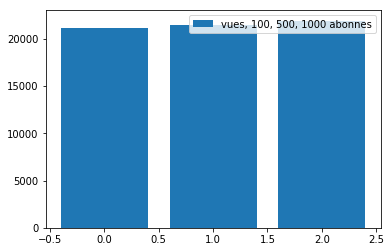

In [15]:
import matplotlib.pyplot as plt

liste_abonnes=[100,500,1000]
liste_pop_touchee=[21126,21509,21930]


plt.bar(range(len(liste_pop_touchee)), liste_pop_touchee)


plt.legend(["vues, 100, 500, 1000 abonnes"])
plt.show()



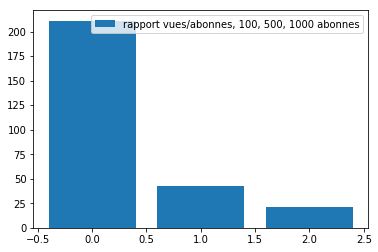

[211, 43, 21]


In [17]:
import matplotlib.pyplot as plt

liste_abonnes=[100,500,1000]
liste_pop_touchee=[21126,21509,21930]

liste_rapport=[]
for i in range(3):
    liste_rapport.append(liste_pop_touchee[i]//liste_abonnes[i])

plt.bar(range(len(liste_rapport)), liste_rapport)


plt.legend(["rapport vues/abonnes, 100, 500, 1000 abonnes"])
plt.show()

print(liste_rapport)


Puis prop_min_init:

In [18]:
print (moyenne_3_resultats(1000, 0.1, 0.1, 1e6, 0.6, 0.01))

print (moyenne_3_resultats(1000, 0.2, 0.1, 1e6, 0.6, 0.01))

print (moyenne_3_resultats(1000, 0.3, 0.1, 1e6, 0.6, 0.01))

print (moyenne_3_resultats(1000, 0.4, 0.1, 1e6, 0.6, 0.01))

(19766, 7476, 5)
(22007, 8494, 5)
(23954, 9485, 6)
(26054, 10726, 6)


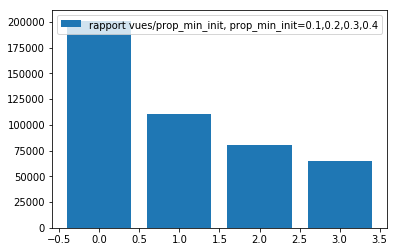

[200999.0, 110459.0, 80520.0, 64724.0]


In [19]:
import matplotlib.pyplot as plt

liste_prop_min_init=[0.1,0.2,0.3,0.4]
liste_pop_touchee=[20100,22092,24156,25890]

liste_rapport=[]
for i in range(4):
    liste_rapport.append(liste_pop_touchee[i]//liste_prop_min_init[i])

plt.bar(range(len(liste_rapport)), liste_rapport)


plt.legend(["rapport vues/prop_min_init, prop_min_init=0.1,0.2,0.3,0.4"])
plt.show()

print(liste_rapport)


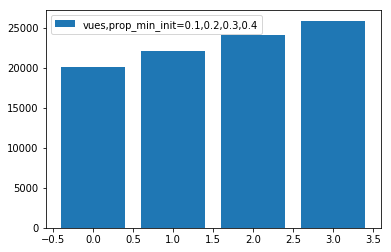

In [20]:
import matplotlib.pyplot as plt

liste_prop_min_init=[0.1,0.2,0.3,0.4]
liste_pop_touchee=[20100,22092,24156,25890]


plt.bar(range(len(liste_pop_touchee)), liste_pop_touchee)

plt.legend(["vues,prop_min_init=0.1,0.2,0.3,0.4"])



plt.show()



Puis le seuil:

In [21]:
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.1, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.2, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.3, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.4, 1e6, 0.6, 0.01))

(22239, 7900, 9)
(20084, 7639, 5)
(17282, 7279, 3)
(14554, 6782, 2)
(11964, 6147, 1)


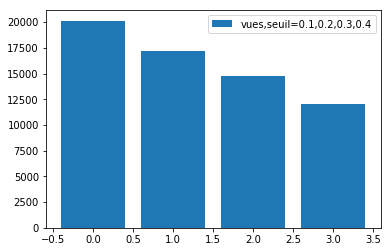

In [22]:
import matplotlib.pyplot as plt

liste_seuil=[0.1,0.2,0.3,0.4]
liste_pop_touchee=[20140,17223,14722,11998]


plt.bar(range(len(liste_pop_touchee)), liste_pop_touchee)

plt.legend(["vues,seuil=0.1,0.2,0.3,0.4"])



plt.show()


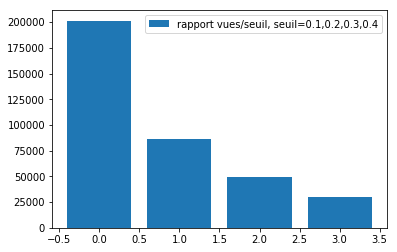

[201399.0, 86114.0, 49073.0, 29994.0]


In [23]:
import matplotlib.pyplot as plt

liste_seuil=[0.1,0.2,0.3,0.4]
liste_pop_touchee=[20140,17223,14722,11998]

liste_rapport=[]
for i in range(4):
    liste_rapport.append(liste_pop_touchee[i]//liste_seuil[i])

plt.bar(range(len(liste_rapport)), liste_rapport)


plt.legend(["rapport vues/seuil, seuil=0.1,0.2,0.3,0.4"])
plt.show()

print(liste_rapport)

Puis la taille du réseau:

In [24]:
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e7, 0.6, 0.01))

(21899, 7696, 9)
(210870, 71831, 10)


Puis like_sub_gen:

In [25]:
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.7, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.8, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.9, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 1,   0.01))

(21915, 7703, 9)
(24836, 9118, 10)
(28796, 11341, 11)
(32839, 13728, 12)
(38624, 17678, 13)


Puis proba_exploration:

In [28]:

print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.01))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.02))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.03))
print (moyenne_3_resultats(1000, 0.1, 0.01, 1e6, 0.6, 0.04))

(22039, 7762, 9)
(43161, 14895, 9)
(64300, 22107, 10)
(84893, 29089, 10)


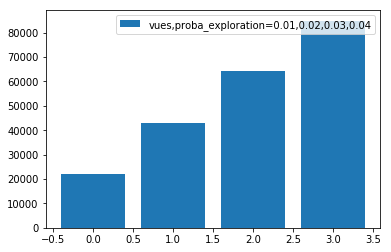

In [30]:
import matplotlib.pyplot as plt

liste_proba_exploration =[0.01,0.02,0.03,0.04]
liste_pop_touchee=[22039,43161,64300,84893]


plt.bar(range(len(liste_pop_touchee)), liste_pop_touchee)

plt.legend(["vues,proba_exploration=0.01,0.02,0.03,0.04"])



plt.show()


Notre modèle représente plûtot bien le tassement des vues et likes au fil des générations, mais très mal son augmentation dans le cas d'un "buzz".

Le nombre de vues augmente très légèrement quand on augmente le nombre d'abonnés: c'est un facteur qui compte, mais qui compte peu dans notre modèle.

De manière générale, tous les paramètres influent de manière logique (instinctive) sur le nombre total de vues.

Le nombre de vues augmente linéairement quand on fait varier proba_exploration, le seuil, et prop_min_init.

Le paramètre prop_min_init, proportion minimale de likes à la première génération (correspondant à la fidélité des abonnés) joue donc un rôle important: il détermine le nombre de likes à la première génération (en moyenne), ce qui impactera directement le nombre total de vues. 
Dans notre modèle, c'est donc le nombre de likes de la première génération qui détermine le nombre total de vues, plus que le nombre d'abonnés.

L'hypothèse de départ (plus une publication est appréciée, plus elle a de chances de devenir virale) est donc vérifiée, et on peut même ajouter: plus une publication est appréciée par les abonnés, plus elle a de chances de devenir virale.


Concernant la variable proba_exploration, elle nous indique la facilité pour les codeurs d'un réseau social de gonfler artificiellement ou d'atténuer la diffusion d'une publication. Quand on sait que les réseaux sociaux sont le nouveau média de masse, cela montre la capacité potentielle d'un petit groupe de décideurs (les propriétaires des principaux réseaux sociaux) d'influer de manière considérable sur les interactions de la population.





L'ARE m'a permis de découvrir une nouvelle facette de l'informatique et de la science en général qui est la recherche. Partir d'une feuille blanche est toujours compliqué mais c'est une bonne expérience. Cela permet d'apprendre à aller à l'essentiel, de ne pas se perdre dans les détails, de chercher l'efficacité et des résultats exploitables.
J'ai appris à travailler seul et à travailler dans l'urgence.